In [1]:
from EXP1whiteblackground import clean_experiment_data, calculate_row_mlae, plot_mlae_heatmap, average_mlae_and_visualize, plot_vectorized_predictions_scatter, display_images_combined_by_degree, generate_images_for_multiple_angles, analyze_best_model_by_image_type, analyze_image_type_per_model

I converted from svg to pdf as input for pretrained models as they won't take svg as an input.

### Generate 10 images with 10 angle degrees with aliased, anti-aliasied, and vectorized images.

In [ ]:
generate_images_for_multiple_angles(canvas_size=100, line_length=30, num_angles=10)

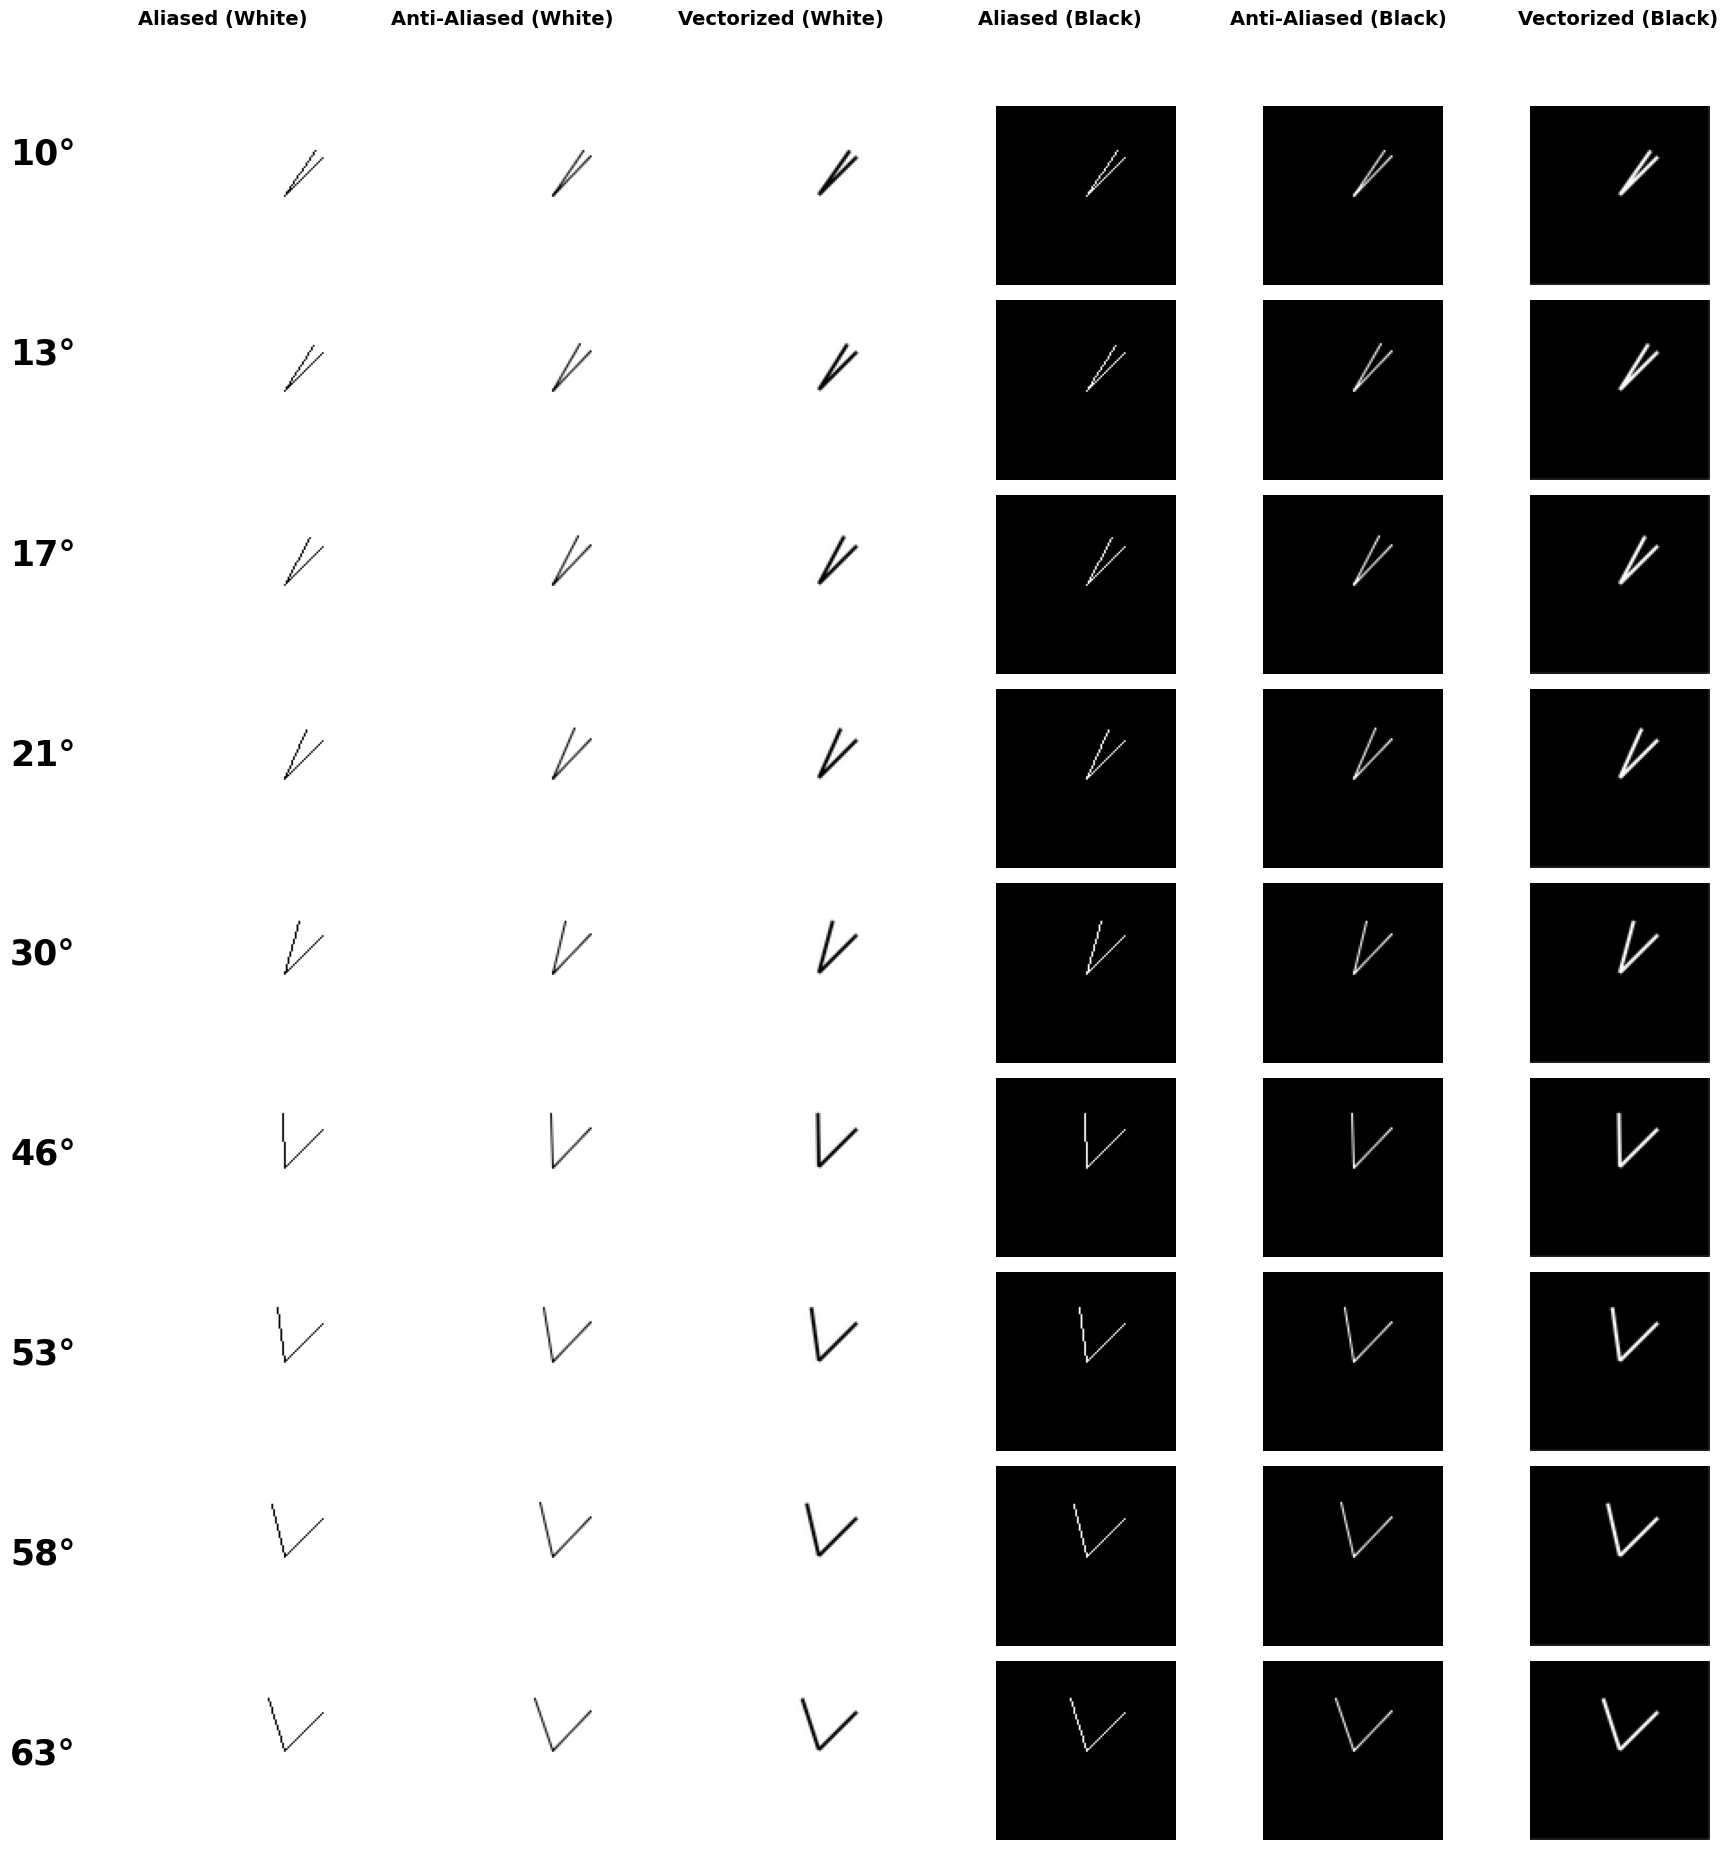

In [5]:
display_images_combined_by_degree("./generated_images")

### Run experiments

In [ ]:
# Add LLMP path
from EXP1whiteblackground import generate_images_for_multiple_angles, display_images_combined_by_degree, Runexp1, prepare_image_data
import LLMP as L

image_dir = "./generated_images"

# Prepare image data
data = prepare_image_data(image_dir)

# Define model instances
model_instances = {
    "gpt4o": L.GPTModel("gpt-4o"),
    #"LLaMA": L.llama("meta-llama/Llama-3.2-11B-Vision-Instruct"),
    "GeminiProVision": L.GeminiProVision(),
    "Gemini1_5Flash": L.Gemini1_5Flash()
}
# Create Runexp1 instance and run the experiment
experiment = Runexp1()
experiment.run_angle_experiment(data=data, model_instances=model_instances)

- I won't include Llama model for this experiment as my CUDA has errors now. I already scheduled with Leo to fix this problem next Monday. I might share with you later next week.

In [3]:
from EXP1whiteblackground import clean_experiment_data, calculate_mlae, calculate_row_mlae, plot_mlae_heatmap

df = clean_experiment_data("angle_results.csv")

In [4]:
# Apply MLAE calculation row-wise
df['MLAE'] = df.apply(calculate_row_mlae, axis=1)

df.head()

,file_name,ground_truth,model,prediction,MLAE
0,antialiased_image_white_58.png,58,gpt4o,45,3.714246
1,antialiased_image_white_58.png,58,GeminiProVision,30,4.813781
2,antialiased_image_white_58.png,58,Gemini1_5Flash,45,3.714246
3,aliased_image_black_13.png,13,gpt4o,30,4.098032
4,aliased_image_black_13.png,13,GeminiProVision,45,5.005625


- I group the data by image type and model, then calculates the average MLAE, and visualize it by using bar chart.

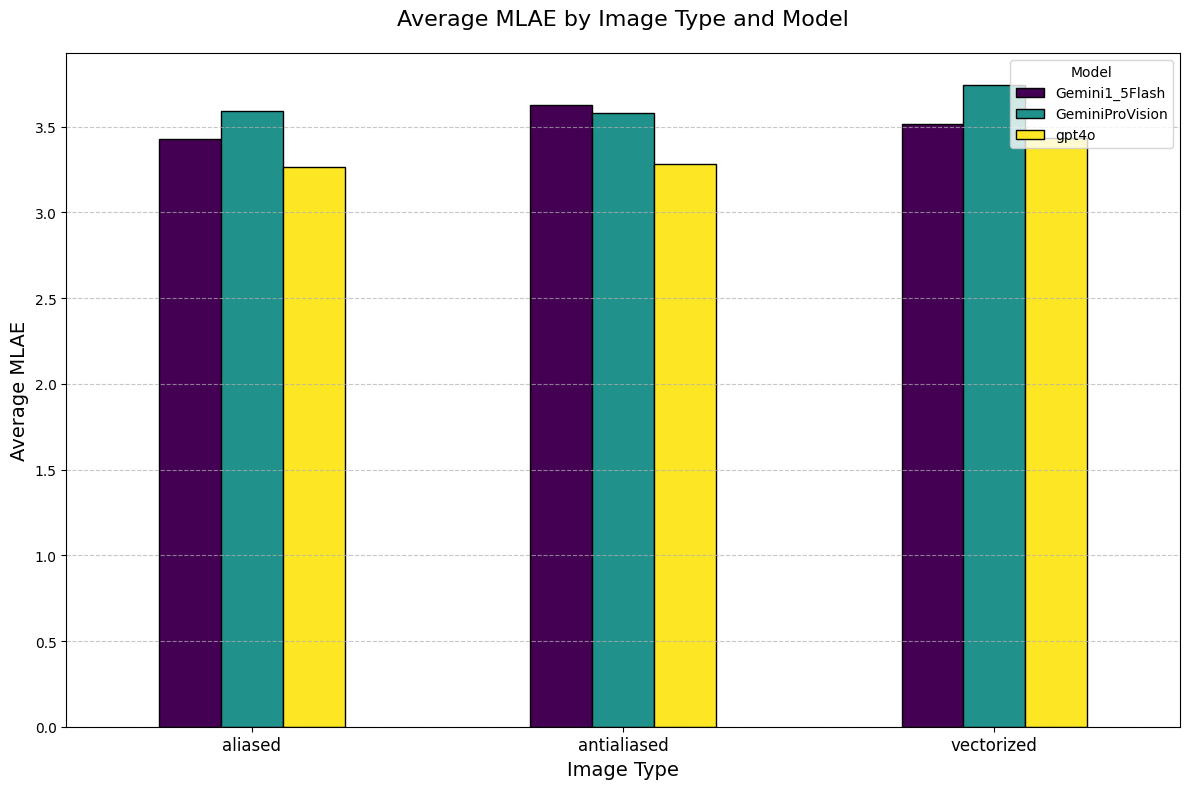

In [12]:
average_mlae_and_visualize(df)


- I also saw the differences in MLAE between the models are relatively small for each type of image in this chart.

- I plotted a scatter plot below in order to visualize prediction and ground truth for vectorized images.

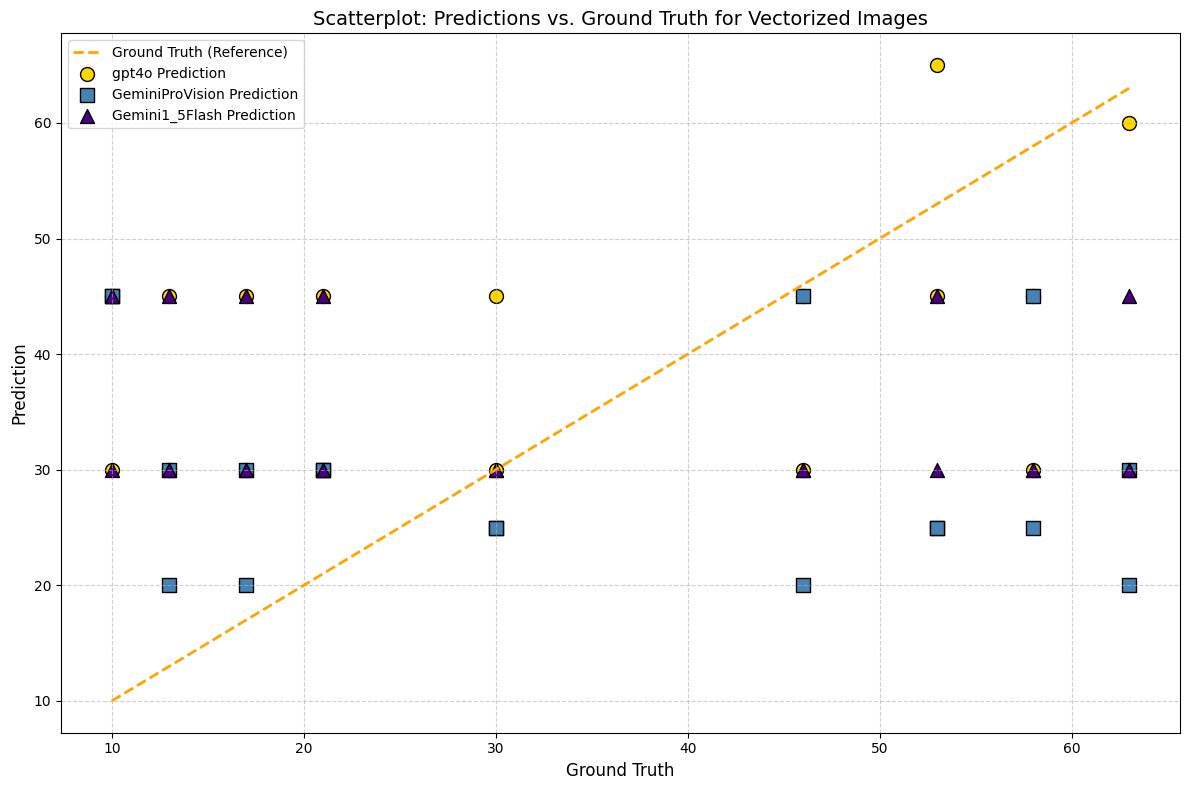

In [15]:
plot_vectorized_predictions_scatter(df)

- Only few predictions near the ground truth. The prediction answers has repetive value like 20, 30, 45 across all models and images.

### Display number of rows for each image type

In [9]:
# Extract the image type from the file name
df['image_type'] = df['file_name'].str.extract(r'(aliased|antialiased|vectorized)')

# Print the count of rows for each image type
row_counts = df['image_type'].value_counts()

for image_type, count in row_counts.items():

    print(f"  {image_type}: {count} rows")

  antialiased: 54 rows
  aliased: 54 rows
  vectorized: 54 rows


### Analyze best model for each image type

1. Group data by images types and models

2. Caculate the average MLAE for each image type and model.

3. Identify the best model by choosing lowest MLAE for each image type

In [5]:
best_model_by_image_type = analyze_best_model_by_image_type(df)

best_model_by_image_type

,image_type,Best Model,Average MLAE
0,aliased,gpt4o,3.267298
1,antialiased,gpt4o,3.281206
2,vectorized,gpt4o,3.434630


- GPT-4o perform bests for all images. Aliased images has lowest number of MLAE, indicating GPT-4o performs slightly better than other images.

### Analyze which image type works best for each model

1. Group data by images types and models

2. Caculate the average MLAE for each image type and model.

3. Identify the best image type with lowest average MLAE for each model.

In [6]:
result_per_model = analyze_image_type_per_model(df)

result_per_model


,model,image_type,MLAE
0,gpt4o,aliased,3.267298
1,Gemini1_5Flash,aliased,3.428782
2,GeminiProVision,antialiased,3.580329


- GPT-4o works best for aliased pictures, and Gemini 1.5 Flash is the second-best for this image. 

- Gemini Pro Vision works best for antialiased images. 

- The vectorized images have higher MLAE than other images, therefore, it won't show the results.